In [62]:
import sys
sys.path.insert(1, '../../utils')
from numpy import log, ndarray
from pandas import read_csv, DataFrame, Series, to_timedelta, date_range
from matplotlib.pyplot import figure, savefig, show, subplots
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from dslabs_functions import plot_line_chart, HEIGHT, ts_aggregation_by
from scipy.stats import norm, expon, lognorm
from seaborn import heatmap

target = 'Total'
filename = "./data/raw/TrafficTwoMonth.csv"
file_tag = "traffic"
data: DataFrame = read_csv(filename, na_values="")

# Create datetime index using sequential 15-minute intervals
# Starting from a reference point (epoch-like approach)
data.index = date_range(start='2000-01-01', periods=len(data), freq='15min')

data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
2000-01-01 00:00:00,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
2000-01-01 00:15:00,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2000-01-01 00:30:00,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
2000-01-01 00:45:00,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
2000-01-01 01:00:00,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


# Dimensionality

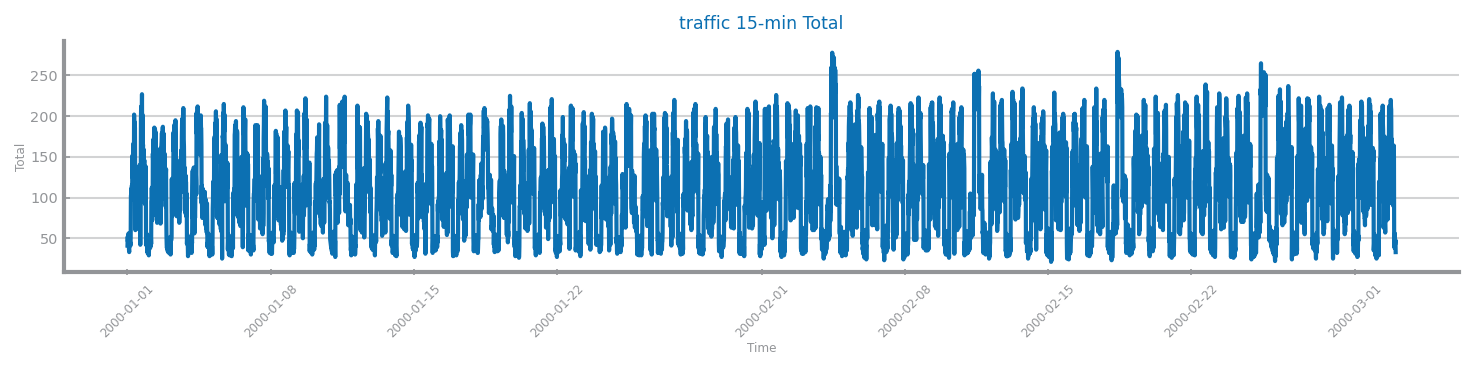

In [63]:
series: Series = data[target]
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel="Time",
    ylabel=target,
    title=f"{file_tag} 15-min {target}",
)
show()

# Granularity

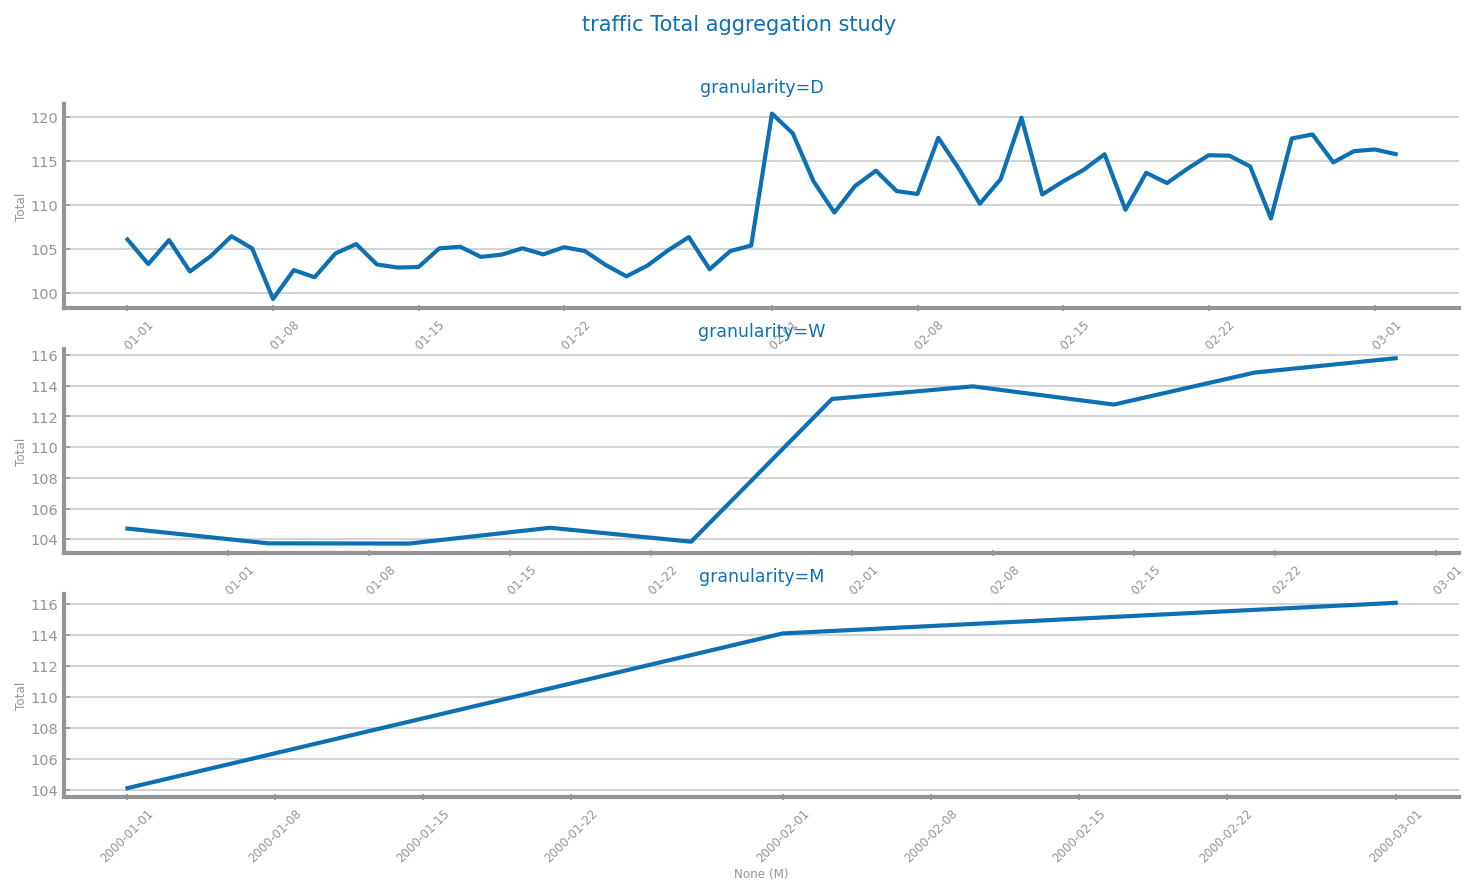

In [65]:
grans: list[str] = ["D", "W", "M"]
fig: Figure
axs: list[Axes]
fig, axs = subplots(len(grans), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(grans)))
fig.suptitle(f"{file_tag} {target} aggregation study")

for i in range(len(grans)):
    ss: Series = ts_aggregation_by(series, grans[i])
    plot_line_chart(
        ss.index.to_list(),
        ss.to_list(),
        ax=axs[i],
        xlabel=f"{ss.index.name} ({grans[i]})",
        ylabel=target,
        title=f"granularity={grans[i]}",
    )
show()

# Distribution

# Seasonality

# Stationarity